In [10]:
import os
data_file_path = "data/"

dir_list = os.listdir(data_file_path)

In [11]:
dir_list_by_parameter = list(map(lambda x: x.split(":"), dir_list))

dir_list_by_parameter[0]
#        0        1         2       3         4         5               6               7             8                   9
# # ['g_16000', 'p_10', 'wc_10', 'gs_42', 'ss_10', 'ipmutp_0.01', 'icmutp_0.005', 'icmaxsw_5', 'ccmutp_0.01.csv', 'fitfn_score1.csv']
VARIABLE_A_INDEX = 6
VARIABLE_B_INDEX = 7

# extract unique numbers (ipmutp) and seeds
unique_ip_mut = set()
unique_seeds = set()
for i in range(len(dir_list_by_parameter)):
  unique_ip_mut.add(dir_list_by_parameter[i][VARIABLE_A_INDEX].split("_")[1])
  unique_seeds.add(dir_list_by_parameter[i][4].split("_")[1])

print(f"{len(unique_ip_mut)}, {len(unique_seeds)}")

3, 40


In [12]:
import pandas as pd

max_iters = 8000

fdf = pd.DataFrame()
for file in dir_list:
  ip_mut = float(file.split(":")[VARIABLE_A_INDEX].split("_")[1])
  seed = int(file.split(":")[4].split("_")[1])
  fitness = str(file.replace(".csv", "").split(":")[9].split("_")[1])
  
  df = pd.read_csv(f"{data_file_path}/{file}")
  df.rename(columns={'Unnamed: 0': 'generation'}, inplace=True)
  df['seed'] = [seed for _ in range(len(df))]
  df['fitness'] = [fitness for _ in range(len(df))]
  fdf = pd.concat((fdf, df[:max_iters]))
  
fdf.head()

,generation,per_it_avg_total_length,per_it_best_total_length,per_it_best_max_car_length,per_it_best_min_car_length,per_it_avg_max_path_length,per_it_avg_fitness,per_it_best_fitness,seed,fitness
0,0,60014.074343,60238.407127,5018.299359,0.0,6026.237850,3.624930e+08,3.022944e+08,4,score1
1,1,61279.061816,60184.671565,5018.299359,0.0,5757.690688,3.596444e+08,3.020247e+08,4,score1
2,2,60275.347345,59931.068301,5018.299359,0.0,5041.509607,3.039036e+08,3.007520e+08,4,score1
3,3,59992.151405,59931.068301,4558.746388,0.0,4972.344062,2.983044e+08,2.732105e+08,4,score1
4,4,59884.097729,59601.243371,4558.746388,0.0,4561.547335,2.731643e+08,2.717070e+08,4,score1


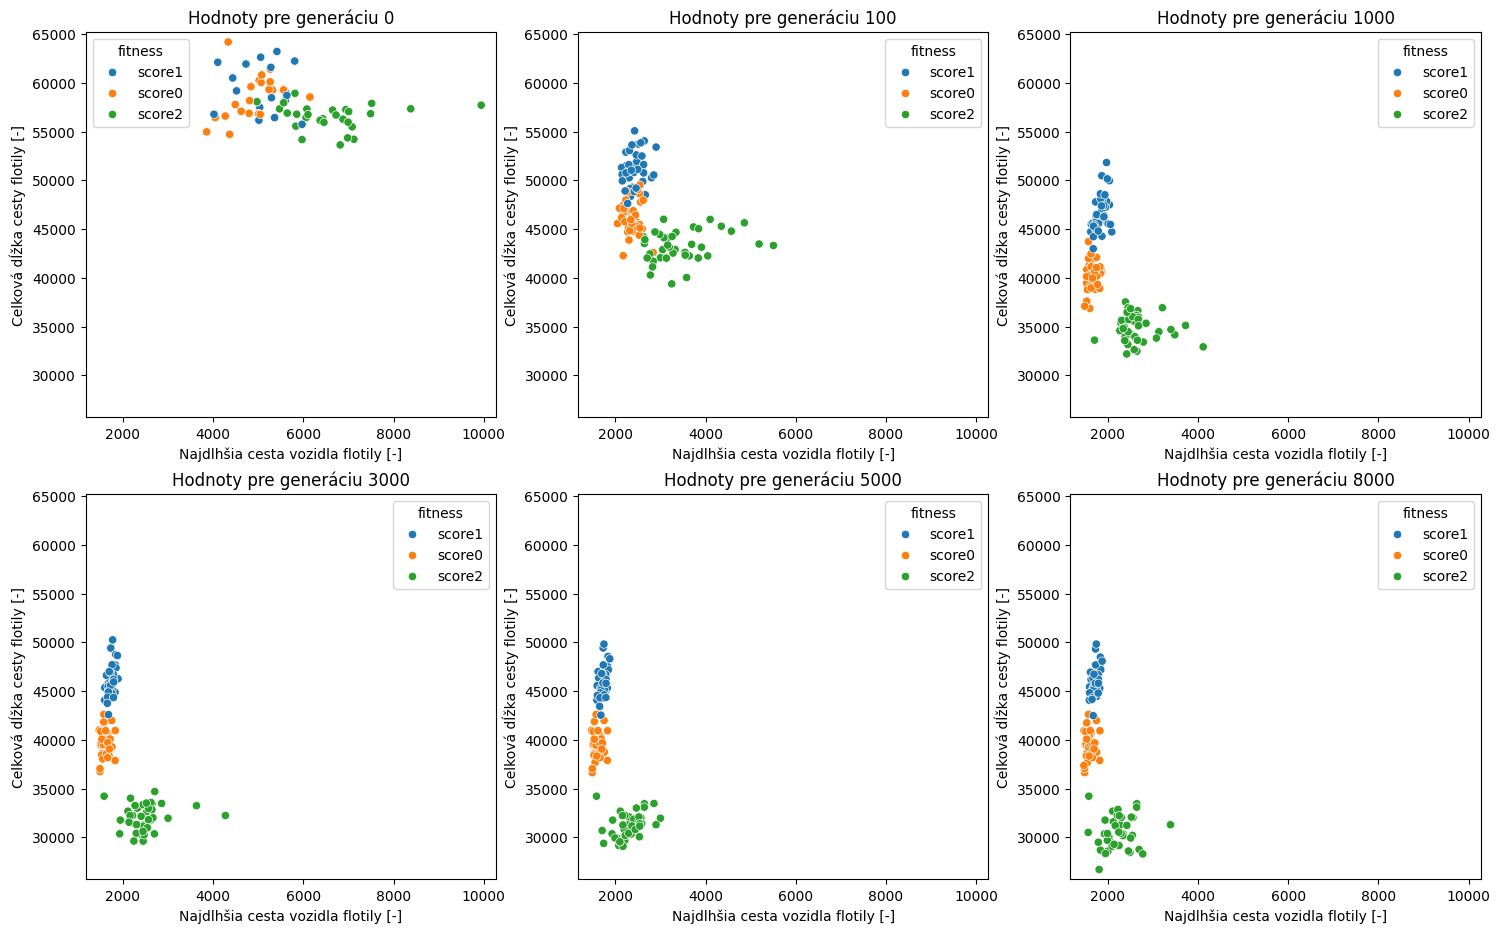

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import duckdb
import numpy as np

fdf_0 = duckdb.sql("SELECT * FROM fdf WHERE generation = 0").df()
fdf_100 = duckdb.sql("SELECT * FROM fdf WHERE generation = 100").df()
fdf_1000 = duckdb.sql("SELECT * FROM fdf WHERE generation = 1000").df()
fdf_3000 = duckdb.sql("SELECT * FROM fdf WHERE generation = 3000").df()
fdf_5000 = duckdb.sql("SELECT * FROM fdf WHERE generation = 5000").df()
fdf_8000 = duckdb.sql("SELECT * FROM fdf WHERE generation = 7999").df()

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 11))
tot_min = np.min(fdf['per_it_best_total_length'])
tot_max = np.max(fdf['per_it_best_total_length'])
max_min = np.min(fdf['per_it_best_max_car_length'])
max_max = np.max(fdf['per_it_best_max_car_length'])

titles = [[0, 100, 1000], [3000, 5000, 8000]]

for i in range(2):
  for j in range(3):
    axs[i][j].set_xlim((max_min - 300, max_max + 300))
    axs[i][j].set_ylim((tot_min - 1000, tot_max + 1000))
    axs[i][j].set_xlabel("Najdlhšia cesta vozidla flotily [-]")
    axs[i][j].set_ylabel("Celková dĺžka cesty flotily [-]")
    axs[i][j].set_title(f"Hodnoty pre generáciu {titles[i][j]}")

sns.scatterplot(ax=axs[0][0], data=fdf_0, x="per_it_best_max_car_length", y="per_it_best_total_length", hue="fitness")
sns.scatterplot(ax=axs[0][1], data=fdf_100, x="per_it_best_max_car_length", y="per_it_best_total_length", hue="fitness")
sns.scatterplot(ax=axs[0][2], data=fdf_1000, x="per_it_best_max_car_length", y="per_it_best_total_length", hue="fitness")
sns.scatterplot(ax=axs[1][0], data=fdf_3000, x="per_it_best_max_car_length", y="per_it_best_total_length", hue="fitness")
sns.scatterplot(ax=axs[1][1], data=fdf_5000, x="per_it_best_max_car_length", y="per_it_best_total_length", hue="fitness")
sns.scatterplot(ax=axs[1][2], data=fdf_8000, x="per_it_best_max_car_length", y="per_it_best_total_length", hue="fitness")
plt.show()

fig.savefig("distibution.png")

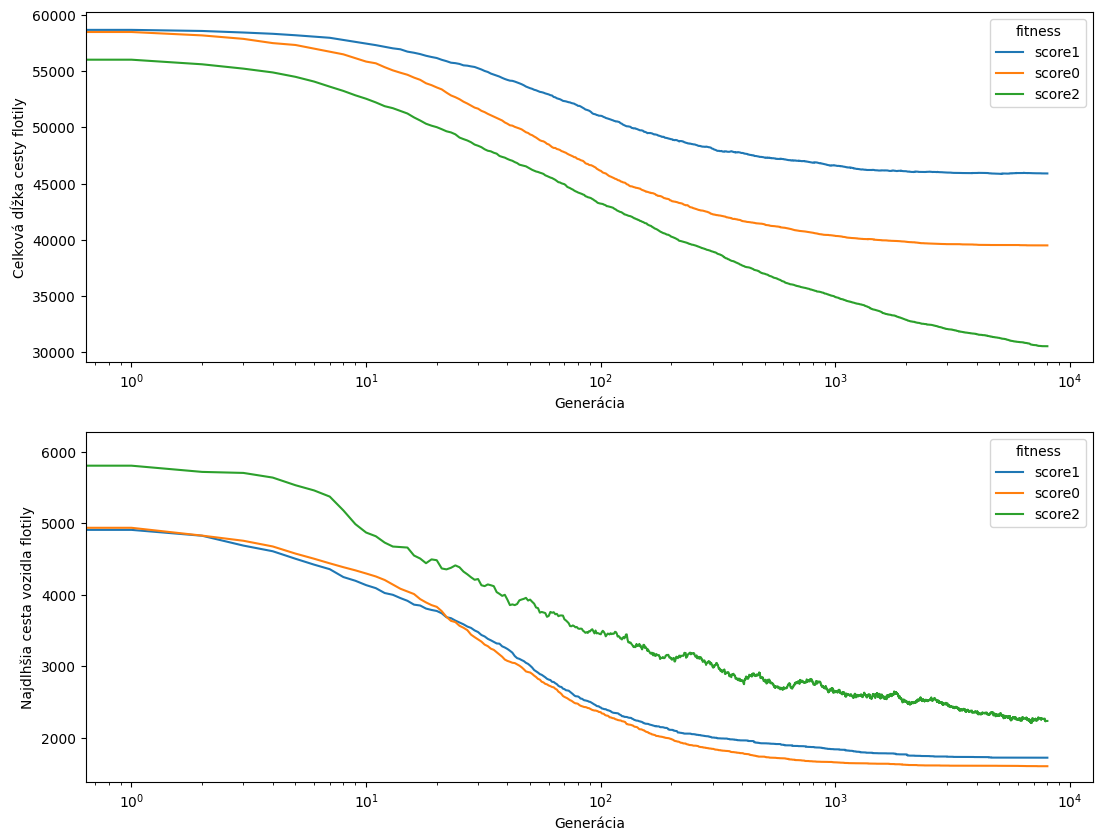

In [29]:

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(13, 10))

axs[0].set(xscale="log")
axs[1].set(xscale="log")

axs[0].set_xlabel("Generácia")
axs[1].set_xlabel("Generácia")

axs[0].set_ylabel("Celková dĺžka cesty flotily")
axs[1].set_ylabel("Najdlhšia cesta vozidla flotily")

sns.lineplot(ax=axs[0], data=fdf, x="generation", y="per_it_best_total_length", hue="fitness", errorbar=None)
sns.lineplot(ax=axs[1], data=fdf, x="generation", y="per_it_best_max_car_length", hue="fitness", errorbar=None)
plt.show()


fig.savefig("convergence.png")